<b>Introduction à l'apprentissage machine (GIF-4101 / GIF-7005)</b><img src="https://vision.gel.ulaval.ca/~cgagne/enseignement/apprentissage/A2019/ul_logo.png" width=200 align="right"><br>
<b>Département de génie électrique et de génie informatique</b><br>
<b>Automne 2019</b>

# Devoir 2

## Instructions
- Formation des équipes
    - GIF-4101 : le devoir est réalisé en équipe de deux à trois étudiants.
    - GIF-7005 : le devoir est réalisé individuellement.
    - Les équipes sont les mêmes que celles du devoir 1.
- Programmation
    - Produisez vos solutions dans le notebook (.ipynb) directement, en respectant les instructions.
    - La performance attendue et le temps de calcul approximatif requis sont vérifiés dans le code, tout écart trop important par rapport à ces valeurs attendues entraînera *la note de zéro (0)* pour la sous-question correspondante.
- Remise
    - La remise du notebook (.ipynb) complété se fait dans monPortail.
    - La remise doit être effectuée au plus tard le mercredi 16 octobre à 9h30.
- Pondération
    - Ce devoir compte pour 7% de la note finale.

## Identification

- Numéro d'équipe : 6
- Étudiant 1 : Geoffroy, Guillaume, 111 274 386
- Étudiant 2 (GIF-4101 seulement) : Johnson, Noah, 111 155 541


## Notions sur Jupyter Notebook
- Vous pouvez double-cliquer sur une cellule pour voir le contenu de celle-ci.
- Vous pouvez exécuter une cellule avec `Shift-Enter`.
- Vous pouvez écrire en *italique*, **gras** ou `code` (double-cliquer sur la cellule pour voir comment).
- Vous pouvez faire une équation $\LaTeX$ sur une ligne: $y = mx + b$.
- Vous pouvez faire une équation $\LaTeX$ centrée: $$y = mx + b.$$
- Vous pouvez imbriquer des listes:
    - Niveau 2
        - Niveau 3
- N'hésitez pas à vous inspirer des équations dans la question pour écrire vos équations.
- Si vous le désirez, vous pouvez utiliser [Google Colaboratory](https://colab.research.google.com) en *téléversant* le notebook. Mais c'est votre responsabilité de vous assurez que le résultat du notebook déposé dans monPortail s'exécute correctement avec Jupyter.
- La *commande magique* `%matplotlib notebook` permet de générer des figures interactives dans le notebook. Cela pourrait vous être utile pour naviguer dans une figure. Si vous exécuter le notebook dans Google Colaboratory, vous devez changer la commande pour `%matplotlib inline`.

In [1]:
import time
import numpy

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
from matplotlib import pyplot, patches

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Classifieurs utilisés
from sklearn.datasets import make_classification, load_breast_cancer, load_iris
from sklearn.preprocessing import minmax_scale, normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
            "Le temps maximum permis est de {0:.4f} secondes, mais votre code a requis {1:.4f} secondes! ".format(maxduration,duration)+
            "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!")
        
# Définition des durées d'exécution maximales pour chaque sous-question
TMAX_Q1A = 1.0
TMAX_Q1B = 2.5
TMAX_Q2B = 5.0
TMAX_Q2disp = 10.0
TMAX_Q2C = 20
TMAX_Q2Fbc = 60
TMAX_Q2Firis = 40
TMAX_Q2Gbc = 30
TMAX_Q2Giris = 15

## Question 1 : Estimation de densité par noyau (5pt)
Soit une densité-mélange combinant deux lois normales en une dimension,

$$p(x) = \sum_i P(\mathcal{G}_i)\,p(x|\mathcal{G}_i) = \pi_1\,\mathcal{N}(\mu_1,\sigma_1^2) + \pi_2\,\mathcal{N}(\mu_2,\sigma_2^2),$$
où $\pi_1=0,4$, $\mu_1=0$, $\sigma_1^2=1$, $\pi_2=0,6$, $\mu_2=5$ et $\sigma_2^2=1$. La cellule suivante contient une fonction nommée *pdf* qui vous permet d'obtenir la densité de probabilité correspondante. La figure suivante illustre cette densité-mélange dans le domaine $[-5,~10]$:

<img src="https://vision.gel.ulaval.ca/~cgagne/enseignement/apprentissage/A2019/travaux/mixture.png" width=500 align="center">

In [2]:
# Définition de la PDF de la densité-mélange
def pdf(X):
    return 0.4 * norm(0, 1).pdf(X) + 0.6 * norm(5, 1).pdf(X)

### Q1A
Complétez la fonction *sample(n)* permettant d'échantillonner des données de cette densité où *n* correspond au nombre de données à échantillonner. 

Présentez deux figures, montrant respectivement 50 et 10\,000 données échantillonnées de cette distribution, sous la forme d'histogrammes de 25 *bins* dans le domaine $[-5,~10]$. 

Sur ces figures, affichez également la fonction de densité réelle pour permettre d'en comparer la forme avec celles des distributions obtenues.

### <p style="color:red;">Correction de la question Q1A
Vous avez obtenu la note de 1.25/1.25

Explications (si nécessaire):


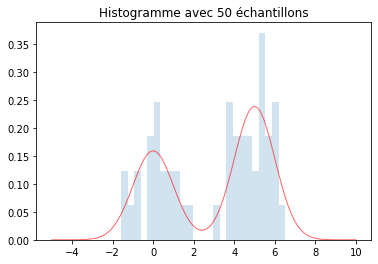

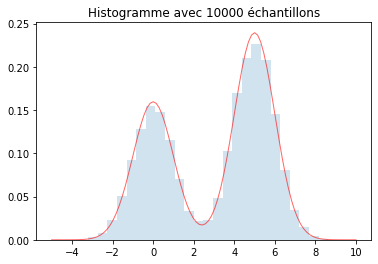

In [5]:
# TODO Q1A
# Complétez la fonction sample(n), qui génère n
# données suivant la distribution mentionnée dans l'énoncé
def sample(n):
    nr1 = n*0.4
    nr2 = n*0.6
    r1 = norm.rvs(loc=0, scale=1, size=int(nr1))
    r2 = norm.rvs(loc=5, scale=1, size=int(nr2))
    r = numpy.concatenate([r1,r2])
    r = r.reshape(n,1)
    return r

_times.append(time.time())


# TODO Q1A
# Échantillonnez 50 et 10 000 données en utilisant la fonction
# sample(n) que vous avez définie plus haut et tracez l'histogramme
# de cette distribution échantillonée, en utilisant 25 bins,
# dans le domaine [-5, 10].
# Sur les mêmes graphiques, tracez également la fonction de densité réelle.

X = numpy.linspace(-5, 10, 100)

sample50 = sample(50)
sample10000 = sample(10000)

fig1, ax1 = pyplot.subplots(1, 1)
ax1.plot(X, pdf(X),'r-', lw=1, alpha=0.6, label='norm pdf')
ax1.hist(sample50,25,density=True, histtype='stepfilled', alpha=0.2)
pyplot.title('Histogramme avec 50 échantillons')
pyplot.show()

fig2, ax2 = pyplot.subplots(1, 1)
ax2.plot(X, pdf(X),'r-', lw=1, alpha=0.6, label='norm pdf')
ax2.hist(sample10000,25,density=True, histtype='stepfilled', alpha=0.2)
pyplot.title('Histogramme avec 10000 échantillons')
pyplot.show()


# Affichage du graphique
_times.append(time.time())
checkTime(TMAX_Q1A, "1A")
pyplot.show()

### Q1B
Montrez le résultat d'une estimation avec un noyau *Boxcar* (réf. Estimation naïve d'histogramme dans les documents du cours), également connu sous le nom de noyau *tophat*. Appliquez le sur 50 et 10\,000 données, pour les tailles de noyaux (*bandwidth*) de {0.3, 1, 2, 5}.

- Présentez vos résultats en deux figures, une pour les résultats sur 50 données et l'autre pour les résultats sur 10\,000 données;
- Utilisez une couleur de courbe différente pour chaque taille de noyau;
- Ajoutez une légende à vos figures.

### <p style="color:red;">Correction de la question Q1B
Vous avez obtenu la note de 1.25/1.25

Explications (si nécessaire):


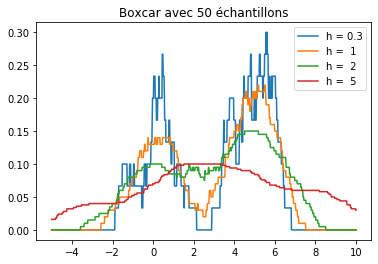

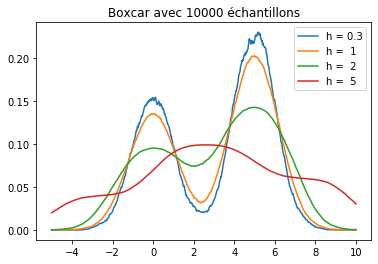

In [7]:
_times.append(time.time())

# Échantillonnez 50 et 10 000 données, mais utilisez cette fois une
# estimation avec noyau boxcar pour présenter les données. Pour chaque
# nombre de données (50 et 10 000), vous devez présenter les distributions
# estimées avec des tailles de noyau (bandwidth) de {0.3, 1, 2, 5}, dans
# la même figure, mais tracées avec des couleurs différentes.


XX = numpy.linspace(-5, 10, 1000)
XX = XX.reshape(1000,1)
h = [0.3, 1, 2, 5]
fig3, ax3 = pyplot.subplots(1, 1)
for i in h:
    kde = KernelDensity(kernel='tophat', bandwidth=i).fit(sample50)
    log_dens = kde.score_samples(XX)
    ax3.plot(XX[:, 0], numpy.exp(log_dens))
pyplot.legend(('h = 0.3', 'h =  1', 'h =  2','h =  5'))
pyplot.title('Boxcar avec 50 échantillons')
pyplot.show()

fig4, ax4 = pyplot.subplots(1, 1)
for i in h:
    kde = KernelDensity(kernel='tophat', bandwidth=i).fit(sample10000)
    log_dens = kde.score_samples(XX)
    ax4.plot(XX[:, 0], numpy.exp(log_dens))
pyplot.legend(('h = 0.3', 'h =  1', 'h =  2','h =  5'))
pyplot.title('Boxcar avec 10000 échantillons')
pyplot.show()
    
# Affichage du graphique
_times.append(time.time())
checkTime(TMAX_Q1B, "1B")
pyplot.show()

### Q1C
Expliquez les principales différences et similarités entre une estimation par noyau et une approche basée sur les $k$-*PPV*. Quel lien peut-on faire entre eux?

### <p style="color:red;">Correction de la question Q1C
Vous avez obtenu la note de /1.25

Explications (si nécessaire):


#### Réponse Q1C

\* _Entrez votre réponse pour Q1C ici_ \*

### Q1D
Expliquez pourquoi les $k$*-PPV* sont intéressants pour le classement et la régression, mais peu adaptés à l'estimation de densité?

### <p style="color:red;">Correction de la question Q1D
Vous avez obtenu la note de /1.25

Explications (si nécessaire):


#### Réponse Q1D

\* _Entrez votre réponse pour Q1D ici_ \*

## Question 2 : Discriminants linéaires et $k$-plus proches voisins pour la classification (15pt)

Soit un discriminant linéaire, avec lequel le classement est effectué selon:

\begin{equation*}
\mathrm{h}(\mathbf{x}|\mathbf{w},w_0) = \mathbf{w}^\top \mathbf{x} + w_0,\quad \mathbf{x}^t\in\left\{\begin{array}{cc}C_1 & \mathrm{h}(\mathbf{x}|\mathbf{w},w_0)\geq 0\\ C_2 & \mbox{autrement}\end{array}\right..
\end{equation*}

On effectue un entraînement avec une descente du gradient basée sur le critère d'erreur suivant:
\begin{equation*}
E(\mathbf{w},w_0|\mathcal{X}) = \frac{1}{2} \sum_{\mathbf{x}^t\in\mathcal{Y}} \frac{[r^t - \mathrm{h}(\mathbf{x}^t|\mathbf{w},w_0)]^2}{\|\mathbf{x}^t\|^2},
\end{equation*}
où $r^t\in\{-1,1\}$ et $\mathcal{Y}$ est l'ensemble des données de $\mathcal{X}$ mal classées,
\begin{equation*}
\mathcal{Y} = \{\mathbf{x}^t\in\mathcal{X}~|~r^t \mathrm{h}(\mathbf{x}^t|\mathbf{w},w_0)\leq 0\}.
\end{equation*}
Si l'ensemble $\mathcal{Y}$ est vide, alors $E(\mathbf{w},w_0|\mathcal{X})=0$.

### Q2A
Donnez le développement mathématique complet des équations permettant d'effectuer la mise à jour des poids $\mathbf{w}$ et $w_0$ par descente du gradient, selon le critère d'erreur proposé.

### <p style="color:red;">Correction de la question Q2A
Vous avez obtenu la note de 0/3

Explications (si nécessaire):


#### Réponse Q2A

$$E = \frac{1}{2} \displaystyle\sum_{x^t \in y} \frac{(r^t+w^t x^t+w_{0})^2}{||{x^t}||^2}$$

$$\frac{\partial E}{\partial w_{i}} = - \displaystyle\sum_{x^t \in y} \frac{( x_{i}^t)(r^t+w^t x^t+w_{0})}{||{x^t}||^2}$$

$$\frac{\partial E}{\partial w_{0}} = - \displaystyle\sum_{x^t \in y} \frac{(r^t+w^t x^t+w_{0})^2}{||{x^t}||^2}$$

### Q2B
Implémentez une classe Python correspondant à ce discriminant linéaire, en programmant au minimum les fonctions *fit*, *predict*, *score* de l'interface *Scikit-learn*.

### <p style="color:red;">Correction de la question Q2B
Vous avez obtenu la note de 1/2

Explications (si nécessaire): (-1) Comment implémenter le code si vous n'avez pas les équations de descente de gradient?


In [13]:
# Implémentation du discriminant linéaire
class DiscriminantLineaire:
    def __init__(self, eta=1e-2, epsilon=1e-2, max_iter=1000):
        # Cette fonction est déjà codée pour vous, vous n'avez qu'à utiliser
        # les variables membres qu'elle définit dans les autres fonctions de
        # cette classe.
        self.eta = eta
        
        # Epsilon et max_iter servent à stocker les critères d'arrêt
        # max_iter est un simple critère considérant le nombre de mises à jour
        # effectuées sur les poids (autrement dit, on cesse l'apprentissage
        # après max_iter itération de la boucle d'entraînement), alors que
        # epsilon indique la différence minimale qu'il doit y avoir entre
        # les erreurs de deux itérations successives pour que l'on ne
        # considère pas l'algorithme comme ayant convergé. Par exemple,
        # si epsilon=1e-2, alors tant que la différence entre l'erreur
        # obtenue à la précédente itération et l'itération courante est
        # plus grande que 0.01, on continue, sinon on arrête.
        self.epsilon = epsilon
        self.max_iter = max_iter
    
    
    def fit(self, X, y):
        # Implémentez la fonction d'entraînement du classifieur, selon
        # les équations que vous avez développées dans votre rapport.

        # On initialise les poids aléatoirement
        w = numpy.random.rand(X.shape[1]+1)

        # TODO Q2B - Fonction d'entraînement
        # Vous devez ici implémenter l'entraînement.
        # Celui-ci devrait être contenu dans la boucle suivante, qui se répète
        # self.max_iter fois
        # Vous êtes libres d'utiliser les noms de variable de votre choix, sauf
        # pour les poids qui doivent être contenus dans la variable w définie plus haut
        
        index = 0
        self.cat1 =  max(y)
        self.cat2 =  min(y)
        ######
        erreur = 1
        E_prec = 0
        i = 0
        while i < self.max_iter and erreur > self.epsilon :
            e = 0
            sumi = numpy.array([0.0 for i in range(len(w[1:]))])
            sum0 = 0
            E_calc = 0
            for t in range(len(X)):
                h = numpy.dot(w[1:], numpy.transpose(X[t])) + w[0]
                if y[t] == self.cat1:
                    rj = 1
                else:
                    rj = -1
                if h*rj <= 0:
                    e = (rj - h)/(numpy.linalg.norm(X[t])**2)
                    sum0 += e
                    sumi += [e*X[t][k] for k in range(len(sumi))]
                    E_calc += (rj - h)**2/(numpy.linalg.norm(X[t])**2)
            deltaw0 = self.eta*sum0 
            deltawi = self.eta*sumi
            w[0] += deltaw0
            w[1:] += deltawi
            E_calc = (1/2)*E_calc
            erreur = abs(E_calc - E_prec)
            E_prec = E_calc
            i += 1
            #pass # Retirer le "pass" et compléter le code ici
        
        # À ce stade, la variable w devrait contenir les poids entraînés
        # Copie des poids entraînés dans une variable membre pour les conserver
        self.w = w
    
    
    def predict(self, X):
        # TODO Q2B - Fonction de prédiction
        # Implémentez la fonction de prédiction
        #pass # Retirer le "pass" et compléter le code ici
        
        y=[]
        classe = [numpy.dot(self.w[1:], numpy.transpose(X[t])) + self.w[0]  for t in range(len(X))]
        for element in classe:
            if element > 0:
                y.append(self.cat1)
            else:
                y.append(self.cat2)
        return(y)
    
    
    def score(self, X, y):
        # TODO Q2B - Fonction de calcul du score
        # Implémentez la fonction retournant le score (précision / accuracy)
        # du classifieur sur les données reçues en argument.
        # Vous pouvez supposer que fit() a préalablement été exécuté
        # Indice : réutiliser votre implémentation de predict() réduit de
        # beaucoup la taille de cette fonction!
        y_obt = self.predict(X)
        return(numpy.sum((numpy.array(y_obt) == numpy.array(y)) == True) / len(y))
        #pass # Retirer le "pass" et compléter le code ici

### Q2C
Testez la performance de ce discriminant linéaire sur un jeu de données synthétique à 2 classes, produit avec la fonction *make_classification* de la librairie *Scikit-learn*. Comme l'exercice se limite à valider le bon fonctionnement du classifieur, rapportez les résultats sur l'ensemble des données. Cela signifie que vous incluez également les données d'entraînement pour calculer la performance.

La configuration est la suivante: 
- Données synthétiques comprenant 100 instances selon deux classes et en deux dimensions, avec un cluster par classe, soit *make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)*.

### <p style="color:red;">Correction de la question Q2C
Vous avez obtenu la note de 0.5/2

Explications (si nécessaire): Aucune figure, seulement l'erreur.


In [16]:
_times.append(time.time())


# Problème à 2 classes
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1)
classif = DiscriminantLineaire()
classif.fit(X,y)
print("Erreur: " + str(1-classif.score(X, y)))

# TODO Q2C
# Testez la performance du discriminant linéaire pour le problème
# à deux classes, et tracez les régions de décision


_times.append(time.time())
checkTime(TMAX_Q2disp, "2C")

Erreur: 0.010000000000000009


### Q2D
Implémentez une classe Python correspondant au même discriminant linéaire qu'à la Q2B, en programmant au minimum les fonctions *fit*, *predict*, *score* de l'interface *Scikit-learn*, mais cette fois avec une approche *Un contre tous* pour faire du classement multiclasses avec le discriminant linéaire.

### <p style="color:red;">Correction de la question Q2D
Vous avez obtenu la note de 2/2

Explications (si nécessaire):


In [18]:
# Implémentation du classifieur un contre tous utilisant le discriminant 
# linéaire défini précédemment
class ClassifieurUnContreTous:
    def __init__(self, n_classes, **kwargs):
        # Cette fonction est déjà codée pour vous, vous n'avez qu'à utiliser
        # les variables membres qu'elle définit dans les autres fonctions de
        # cette classe.
        self.n_classes = n_classes
        self.estimators = [DiscriminantLineaire(**kwargs) for c in range(n_classes)]
    
    
    def fit(self, X, y):
        # Implémentez la fonction d'entraînement du classifieur, selon
        # les équations que vous avez développées dans votre rapport.

        # On initialise les poids aléatoirement
        w = numpy.random.rand(X.shape[1]+1)
        
        # TODO Q2B - Fonction d'entraînement
        # Vous devez ici implémenter l'entraînement.
        # Celui-ci devrait être contenu dans la boucle suivante, qui se répète
        # self.max_iter fois
        # Vous êtes libres d'utiliser les noms de variable de votre choix, sauf
        # pour les poids qui doivent être contenus dans la variable w définie plus haut
        
        
        ##### catégorisation
        
        liste_categories = []
        index = 0
        while len(liste_categories) < self.n_classes:
            if y[index] not in liste_categories:
                liste_categories.append(y[index])
            index += 1
        self.liste_categories = liste_categories
        
        
        
        
        
        for i in range(len(self.estimators)):
            y_contre_tous = []
            premier_element = y[0]
            for element in y:
                if (element == liste_categories[i]):
                    y_contre_tous.append(1)
                else:
                    y_contre_tous.append(0)
            self.estimators[i].fit(X, y_contre_tous)
        
        # Retirer le "pass" et compléter le code ici
        
        # À ce stade, la variable w devrait contenir les poids entraînés
        # Copie des poids entraînés dans une variable membre pour les conserver
       # self.liste_w = liste_w
    
    
    def predict(self, X):
        # TODO Q2B - Fonction de prédiction
        # Implémentez la fonction de prédiction
        y=[]
        for t in range(len(X)):
            liste_h = []
            for i in range(len(self.estimators)):
                liste_h.append(numpy.dot(self.estimators[i].w[1:],X[t]) + self.estimators[i].w[0])
            category = self.liste_categories[liste_h.index(max(liste_h))]
            y.append(category)
        return(y)
                #pass # Retirer le "pass" et compléter le code ici
    
    def score(self, X, y):
        # TODO Q2B - Fonction de calcul du score
        # Implémentez la fonction retournant le score (précision / accuracy)
        # du classifieur sur les données reçues en argument.
        # Vous pouvez supposer que fit() a préalablement été exécuté
        # Indice : réutiliser votre implémentation de predict() réduit de
        # beaucoup la taille de cette fonction!
        #pass # Retirer le "pass" et compléter le code ici
        y_obt = self.predict(X)
        return((numpy.sum((numpy.array(y_obt) == numpy.array(y)) == True) / len(y)))
        

### Q2E
Testez la performance de ce discriminant linéaire sur un jeu de données synthétique à 3 classes, produit avec la fonction *make_classification* de la librairie *Scikit-learn*. Comme l'exercice se limite à valider le bon fonctionnement du classifieur, rapportez les résultats sur l'ensemble des données. Cela signifie que vous incluez également les données d'entraînement pour calculer la performance.

La configuration est la suivante:
- Données synthétiques comprenant 100 instances selon trois classes et en deux dimensions, avec un cluster par classe, soit *make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)*.

### <p style="color:red;">Correction de la question Q2E
Vous avez obtenu la note de 0.5/2

Explications (si nécessaire): Aucune figure demandée.


In [23]:
_times.append(time.time())


# Problème à 3 classes
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=3)



# TODO Q2E
# Testez la performance du discriminant linéaire pour le problème
# à trois classes, et tracez les régions de décision

classif2 = ClassifieurUnContreTous(n_classes=3)
classif2.fit(X, y)
print("Erreur: " + str(1-classif2.score(X, y)))



_times.append(time.time())
checkTime(TMAX_Q2disp, "2E")

Erreur: 0.18999999999999995


### Q2F
Comparez les résultats de votre classifieur avec les discriminants linéaires suivants:
  - Méthode paramétrique de loi normale multivariée (*discriminant_analysis.LinearDiscriminantAnalysis*);
  - Descente du gradient avec le critère du perceptron (*linear_model.Perceptron*);
  - Régression logistique (*linear_model.LogisticRegression*).

Utilisez les jeux de données suivants pour faire vos comparaisons:
- Breast Cancer Wisconsin: jeu de 569 données pour l'identification du cancer du sein en 30 dimensions et selon 2 classes. Le jeu est disponible avec la commande *load_breast_cancer()*;
- Iris de Fisher: jeu de 150 données pour l'identification d'Iris, avec des données en 4 dimensions et selon 3 classes. Le jeu est disponible avec la commande *load_iris()*.

Normalisez préalablement les données selon les valeurs minimales et maximales du jeu avec la fonction appelée *minmax_scale*. Faites vos expérimentation selon une validation croisée à trois plis.

Pour cette sous-question:
- Rapportez les paramètres d'entraînement utilisés pour chacun des algorithmes, s'il y a lieu;
- Rapportez les taux d'erreurs en entraînement, en test et le temps de calcul dans le tableau prévu à cet effet;
- Discutez  **<u>brièvement</u>** des résultats obtenus (performances en entraînement, performances en généralisation et temps de calcul).

### <p style="color:red;">Correction de la question Q2F
Vous avez obtenu la note de 1.5/2

Explications (si nécessaire): Taux d'erreur demandé, pas le score.


In [40]:
_times.append(time.time())


# TODO Q2F
# Chargez les données "Breast cancer Wisconsin" et normalisez les de
# manière à ce que leur minimum et maximum soient de 0 et 1

dataset = load_breast_cancer()
X = minmax_scale(dataset.data)
y = dataset.target
kf = KFold(3, shuffle = True)




# TODO Q2F
# Comparez les diverses approches demandées dans l'énoncé sur Breast Cancer
# Initialisez votre discriminant linéaire avec les paramètres suivants :
# DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000)
# Pour les autres approches, conservez les valeurs par défaut
# N'oubliez pas que l'évaluation doit être faite par une validation
# croisée à K=3 plis!

liste_classifieurs = [DiscriminantLineaire(eta=1e-3, epsilon=1e-6, max_iter=10000), LinearDiscriminantAnalysis(), Perceptron(), LogisticRegression()]
liste_erreur = []
for classif in liste_classifieurs:
    a = 0 
    score_train = 0
    score_test = 0
    debut = time.time()
    for k, (train, test) in enumerate(kf.split(X, y)):
        classif.fit(X[train], y[train])
        score_train += classif.score(X[train], y[train])
        score_test += classif.score(X[test], y[test])
    fin = time.time()
    liste_erreur.append([score_train/3, score_test/3, fin - debut])  
print(liste_erreur)

_times.append(time.time())
checkTime(TMAX_Q2Fbc, "2Fbc")

[[0.9815650604082767, 0.950830780655342, 49.20458102226257], [0.9648567328611767, 0.9596027104799035, 0.00891876220703125], [0.9771559505624219, 0.959574863083635, 0.004271268844604492], [0.968358561310929, 0.9525387542931402, 0.006987810134887695]]


/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Résultats et discussion Q2F (Breast cancer Wisconsin)

Tableau des paramètres d'entraînement:

Mon classifieur | LDA |   Perceptron  | LogReg |
----------------|-----|---------------|------- |
    eta=1e-4    |  -  |       -       |   -    |
  epsilon=1e-6  |  -  |       -       |   -    |
 max_iter=10000 |  -  |       -       |   -    |


Taux d'erreurs en entraînement et en test:

Classifieur    | Taux d'err. (Entraînement) | Taux d'err. (Test) | Temps calcul|
---------------|----------------------------|--------------------|-------------|
Mon classifieur|           0.982            |         0.951      |     49      |
LDA            |           0.965            |        0.960       |     0.009   |
Perceptron     |           0.977            |        0.960       |     0.004   |
LogReg         |           0.968            |        0.952       |     0.007   |

Discussion des résultats obtenus (performances en entraînement, performances en généralisation et temps de calcul):
- Mon classifieur: Meilleure performance en entrainement mais moins bonne en test, l'algorithme a un taux d'erreur bon mais a tendense à over-fitter. Le temps de calcul est médiocre
- LDA: Avec le perceptron, possèdent les taux d'erreurs les plus faibles 
- Perceptron: possède le meilleur temps de calcul
- LogReg:

À choisir, le perceptron est le meilleur rapport erreur/temps de calcul

In [41]:
_times.append(time.time())


# TODO Q2F
# Chargez les données "Iris" et normalisez les de
# manière à ce que leur minimum et maximum soient de 0 et 1

dataset = load_iris()
# X = minmax_scale(normalize(dataset.data))
X = minmax_scale(dataset.data)
y = dataset.target
kf = KFold(3, shuffle = True)
# print(minmax_scale(dataset.data[1:10]))
# print(dataset.data[1:10])
# print(minmax_scale(normalize(dataset.data[1:10])))
# print(normalize(minmax_scale(dataset.data[1:10])))

print()
print(normalize(dataset.data[1:10]))

# TODO Q2F
# Comparez les diverses approches demandées dans l'énoncé sur Iris
# Pour utilisez votre discriminant linéaire, utilisez l'approche Un Contre Tous.
# Initialisez vos discriminants linéaires avec les paramètres suivants :
# DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000)
# Pour les autres approches, conservez les valeurs par défaut
# N'oubliez pas que l'évaluation doit être faite par une validation
# croisée à K=3 plis!

liste_classifieurs = [ClassifieurUnContreTous(n_classes=3, eta=1e-4, epsilon=1e-6, max_iter=10000), LinearDiscriminantAnalysis(), Perceptron(), LogisticRegression()]
liste_erreur = []
for classif in liste_classifieurs:
    a = 0 
    score_train = 0
    score_test = 0
    debut = time.time()
    for k, (train, test) in enumerate(kf.split(X, y)):
        classif.fit(X[train], y[train])
        score_train += classif.score(X[train], y[train])
        score_test += classif.score(X[test], y[test])
    fin = time.time()
    liste_erreur.append([score_train/3, score_test/3, fin - debut])  
print(liste_erreur)



_times.append(time.time())
checkTime(TMAX_Q2Firis, "2Firis")


[[0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.81803119 0.51752994 0.25041771 0.01669451]]
[[0.9533333333333333, 0.9466666666666667, 46.27712082862854], [0.98, 0.9666666666666667, 0.003972053527832031], [0.7666666666666666, 0.7799999999999999, 0.004266977310180664], [0.8366666666666668, 0.7933333333333333, 0.004575014114379883]]
[ATTENTION] Votre code pour la question 2Firis met trop de temps à s'exécuter! Le temps maximum permis est de 40.0000 secondes, mais votre code a requis 46.2980 secondes! Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!


/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noahjohnson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/noahjohnson/anaconda3/lib/python3.7/site-pa

#### Résultats et discussion Q2F (Iris de Fisher)

Tableau des paramètres d'entraînement:

Mon classifieur | LDA |   Perceptron  | LogReg |
----------------|-----|---------------|------- |
    eta=1e-4    |  -  |       -       |   -    |
  epsilon=1e-6  |  -  |       -       |   -    |
 max_iter=10000 |  -  |       -       |   -    |


Taux d'erreurs en entraînement et en test:

Classifieur    | Taux d'err. (Entraînement) | Taux d'err. (Test) | Temps calcul|
---------------|----------------------------|--------------------|-------------|
Mon classifieur|          0.953             |        0.946       |     39.1    |
LDA            |          0.98              |        0.96        |     0.004   |
Perceptron     |          0.766             |        0.779       |     0.004   |
LogReg         |          0.836             |        0.793       |     0.004   |

Discussion des résultats obtenus (performances en entraînement, performances en généralisation et temps de calcul):


Le perceptron et le LogReg ne sont pas adaptés à ce problème, ils possèdent des erreurs trop éelvées par rapport aux autres. Notre classifieurs est relativement bon mais possède un temps de calcul trop élevé. On choisirait ici le LDA.

### Q2G
Utilisez une méthode de $k$-plus proches voisins ($k$-Nearest Neighbors) sur les jeux de données Iris de Fisher et Breast Cancer Wisconsin, en normalisant les données. Pour le classifieur, vous pouvez utiliser directement l'implémentation de Scikit-learn (*KNeighborsClassifier*). Utilisez les paramètres par défaut, sauf pour:
- *Pondération (weights)*: Testez avec les valeurs *uniform* et *distance* pour le paramètre *weights*;
- *Nombre de voisins ($k$)*: Pour les deux différentes pondérations, testez avec les valeurs {1, 3, 5, 7, 11, 13, 15, 25, 35, 45}.

Pour l'évaluation, utilisez une méthode de type *Leave-one-out*. Pour chaque jeu, rapportez la performance de chaque paramétrisation dans une figure synthèse.

Discutez **<u>brièvement</u>** des résultats obtenus.

### <p style="color:red;">Correction de la question Q2G
Vous avez obtenu la note de /2

Explications (si nécessaire):

[0.9525483304042179, 0.9701230228471002, 0.9666080843585237, 0.9701230228471002, 0.968365553602812, 0.9736379613356766, 0.9753954305799648, 0.9595782073813708, 0.9560632688927944, 0.9543057996485061]
[0.9525483304042179, 0.9701230228471002, 0.9666080843585237, 0.9701230228471002, 0.9701230228471002, 0.9736379613356766, 0.9771528998242531, 0.9666080843585237, 0.9595782073813708, 0.9543057996485061]


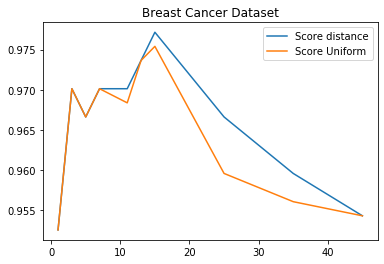

In [24]:
_times.append(time.time())




# TODO Q2G
# Testez un classifeur K plus proches voisins sur Breast Cancer
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!

dataset = load_breast_cancer()
X = minmax_scale(dataset.data)
y = dataset.target


# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et 
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.

scoresUniformWeights = []
scoresDistanceWeights = []

liste_k =  [1, 3, 5, 7, 11, 13, 15, 25, 35, 45]
for k in liste_k:
        classif = KNeighborsClassifier(n_neighbors=k,weights = "uniform")
        loo = LeaveOneOut()
        score = 0
        for train_index, test_index in loo.split(X):
            classif.fit(X[train_index], y[train_index])
            score += classif.score(X[test_index], y[test_index])
        scoresUniformWeights.append(score/loo.get_n_splits(X))
            
for k in liste_k:
        classif = KNeighborsClassifier(n_neighbors=k,weights = "distance")
        loo = LeaveOneOut()
        score = 0
        for train_index, test_index in loo.split(X):
            classif.fit(X[train_index], y[train_index])
            score += classif.score(X[test_index], y[test_index])
        scoresDistanceWeights.append(score/loo.get_n_splits(X))

            
print(scoresUniformWeights)            
print(scoresDistanceWeights)

_times.append(time.time())
checkTime(TMAX_Q2Gbc, "2Gbc")


# TODO Q2G
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
pyplot.plot(liste_k, scoresDistanceWeights)
pyplot.plot(liste_k, scoresUniformWeights)
pyplot.title('Breast Cancer Dataset')
pyplot.legend(('Score distance','Score Uniform'))

pyplot.show()

[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9666666666666667, 0.9466666666666667, 0.9666666666666667, 0.96, 0.9533333333333334, 0.96, 0.94]
[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.96, 0.9466666666666667, 0.96, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.96]


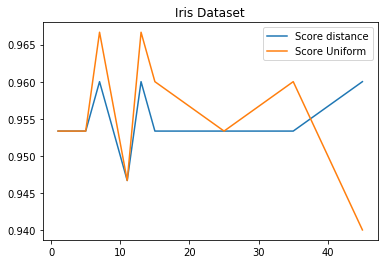

In [25]:
_times.append(time.time())


# TODO Q2G
# Testez un classifeur K plus proches voisins sur Iris
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!

dataset = load_iris()
X = minmax_scale(dataset.data)
y = dataset.target

classif = KNeighborsClassifier()

# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et 
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.


scoresUniformWeights = []
scoresDistanceWeights = []

liste_k =  [1, 3, 5, 7, 11, 13, 15, 25, 35, 45]
for k in liste_k:
        classif = KNeighborsClassifier(n_neighbors=k,weights = "uniform")
        loo = LeaveOneOut()
        score = 0
        for train_index, test_index in loo.split(X):
            classif.fit(X[train_index], y[train_index])
            score += classif.score(X[test_index], y[test_index])
        scoresUniformWeights.append(score/loo.get_n_splits(X))
            
for k in liste_k:
        classif = KNeighborsClassifier(n_neighbors=k,weights = "distance")
        loo = LeaveOneOut()
        score = 0
        for train_index, test_index in loo.split(X):
            classif.fit(X[train_index], y[train_index])
            score += classif.score(X[test_index], y[test_index])
        scoresDistanceWeights.append(score/loo.get_n_splits(X))

            
print(scoresUniformWeights)            
print(scoresDistanceWeights)



_times.append(time.time())
checkTime(TMAX_Q2Giris, "2Giris")


# TODO Q2G
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
pyplot.plot(liste_k, scoresDistanceWeights)
pyplot.plot(liste_k, scoresUniformWeights)
pyplot.legend(('Score distance','Score Uniform'))
pyplot.title('Iris Dataset')
pyplot.show()


#### Discussion des résultats obtenus Q2G
- Breast Cancer Wisconsin: Pour un k=15 et un choix des poids en "distance" l'algorithme est le meilleur
- Iris de Fisher: Pour un k=13 et un choix des poids en "Uniform" l'algorithme est le meilleur